In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing, load_iris, load_boston
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#for comparison.
from sklearn.model_selection import cross_val_score

In [219]:
housing = pd.read_csv('housing.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x130e70978>,
      dtype=object)

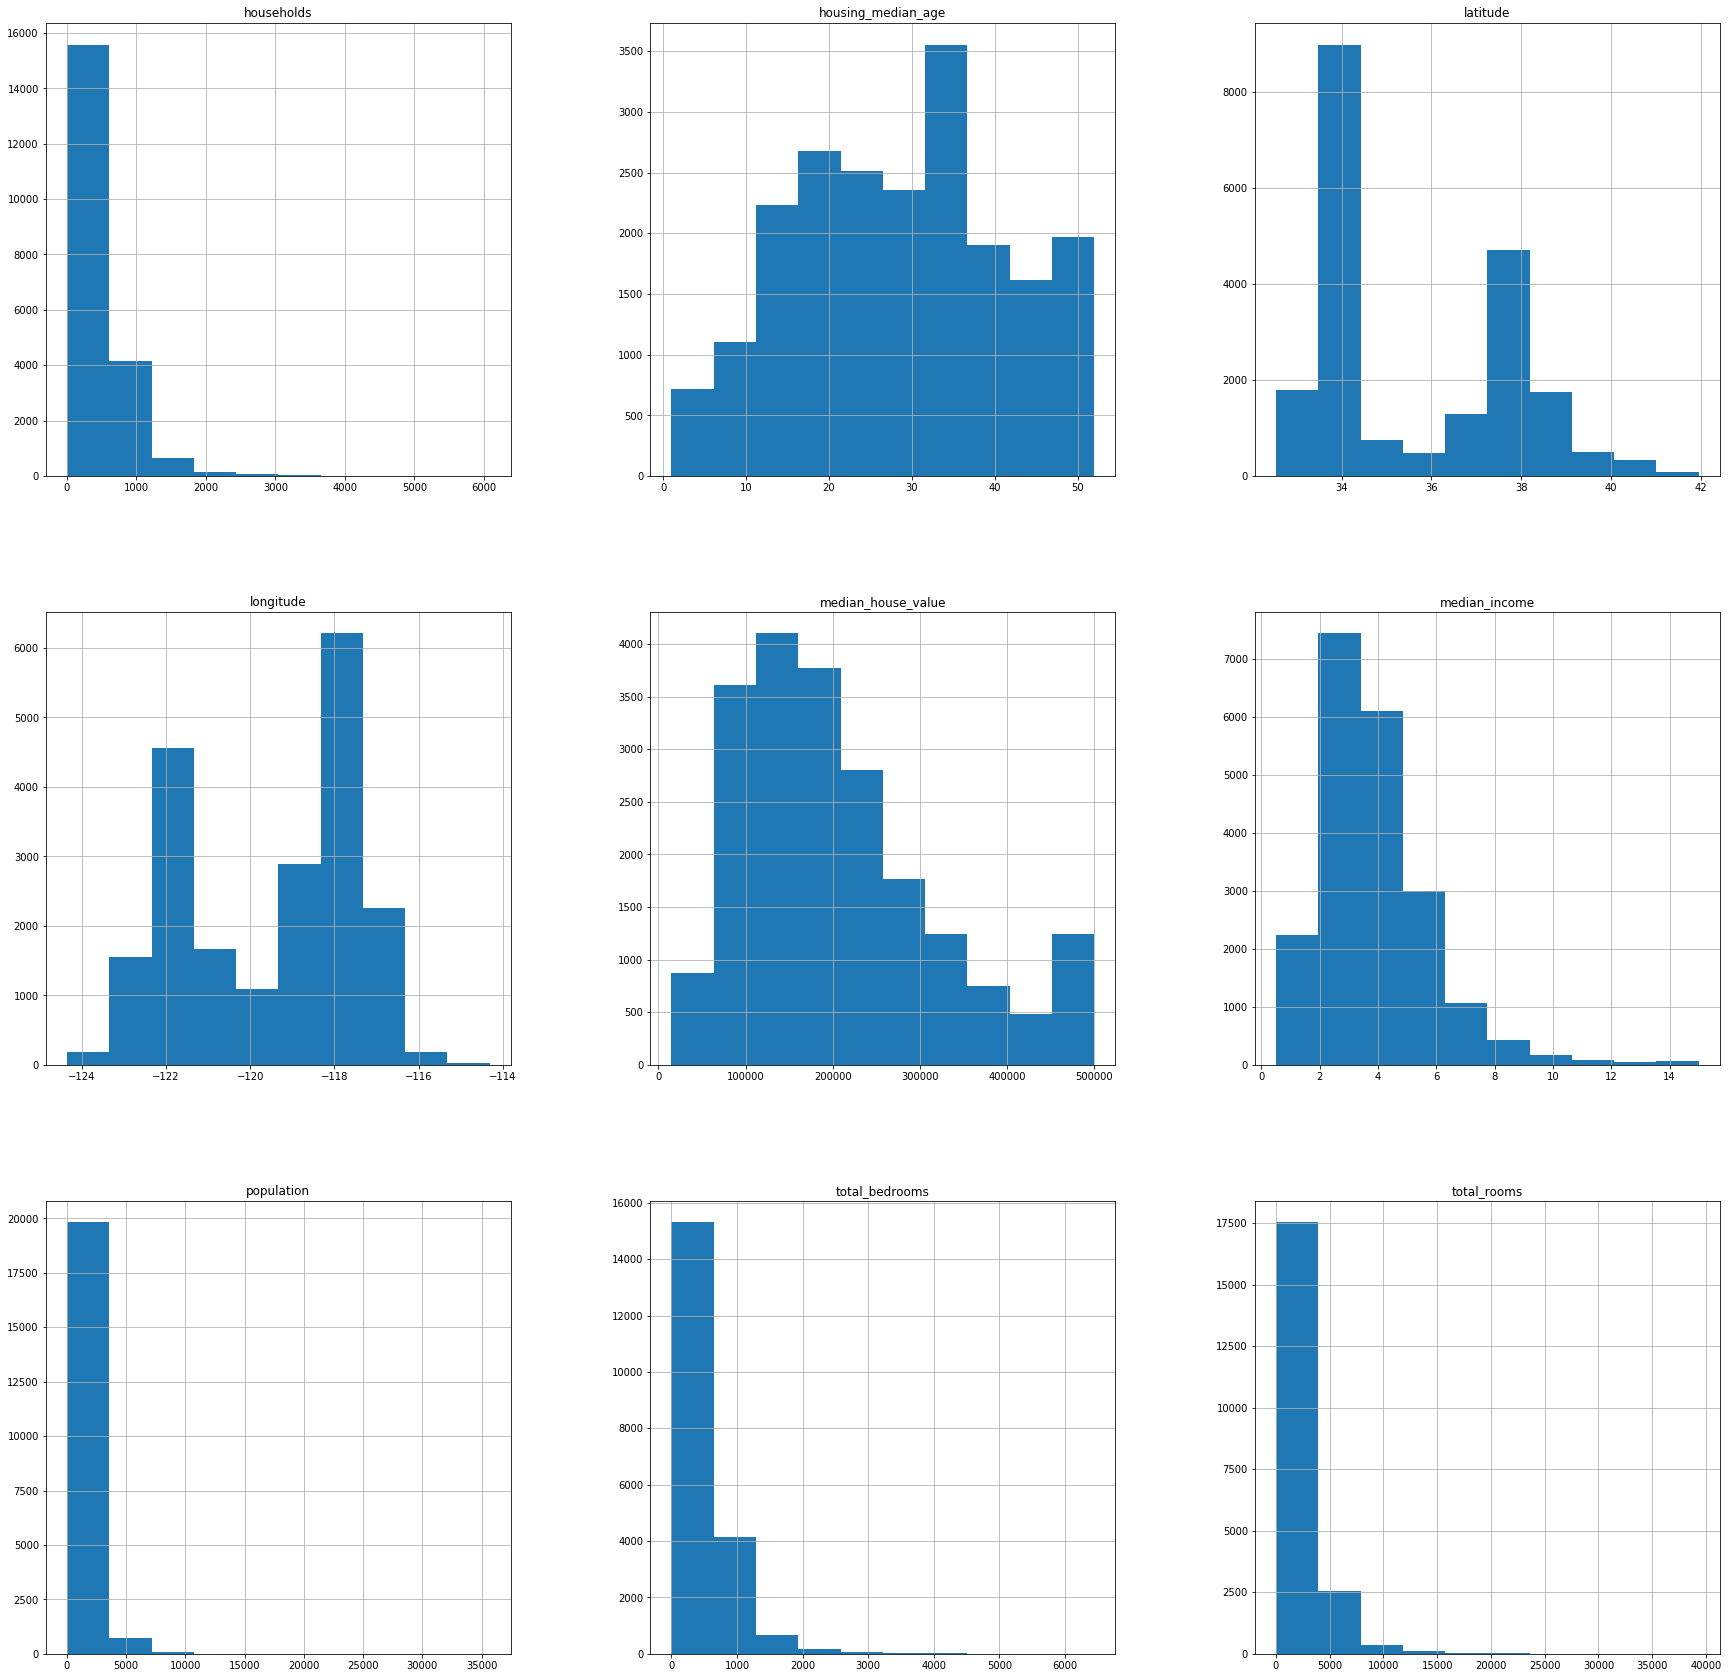

In [220]:
housing.hist(figsize = (30,30))

In [221]:
train_set, test_set = train_test_split(housing, test_size = 0.2, )

In [222]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
18903,-122.26,38.12,28.0,3102.0,734.0,1623.0,639.0,3.1025,103700.0,NEAR BAY
3291,-122.66,39.02,16.0,3715.0,810.0,943.0,510.0,1.7446,109400.0,INLAND
2224,-119.82,36.81,25.0,3305.0,551.0,1149.0,500.0,5.0698,150900.0,INLAND
11089,-117.89,33.80,38.0,51.0,12.0,41.0,10.0,6.0224,187500.0,<1H OCEAN
16078,-122.49,37.73,48.0,1190.0,182.0,497.0,199.0,6.2642,438500.0,NEAR OCEAN


In [223]:
train_set.size

165120

In [224]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
11108,-117.89,33.85,18.0,2036.0,414.0,1292.0,380.0,3.8750,273000.0,<1H OCEAN
1659,-121.91,37.93,13.0,1610.0,198.0,703.0,217.0,8.7059,329400.0,INLAND
17023,-122.32,37.52,26.0,4042.0,591.0,1611.0,578.0,8.4693,419200.0,NEAR OCEAN
13922,-114.94,34.55,20.0,350.0,95.0,119.0,58.0,1.6250,50000.0,INLAND
17901,-121.98,37.37,35.0,995.0,202.0,615.0,199.0,5.0942,217500.0,<1H OCEAN


In [225]:
test_set.size

41280

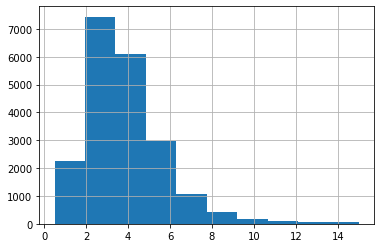

In [226]:
housing['median_income'].hist()

In [227]:
housing['income_cat'] = np.ceil(housing['median_income']/1.5)

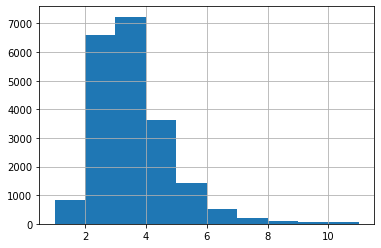

In [228]:
housing['income_cat'].hist()

In [229]:
housing['income_cat'].value_counts()

3.0     7236
2.0     6581
4.0     3639
5.0     1423
1.0      822
6.0      532
7.0      189
8.0      105
9.0       50
11.0      49
10.0      14
Name: income_cat, dtype: int64

In [230]:
housing['income_cat'].where(housing['income_cat']<5 ,5.0, inplace = True)

In [231]:
housing['income_cat'].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

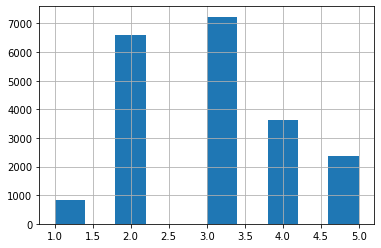

In [232]:
housing['income_cat'].hist()

In [233]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2)

In [234]:
for train_index, test_index, in split.split(housing, housing['income_cat']):
    s_train_set = housing.loc[train_index]
    s_test_set = housing.loc[test_index]

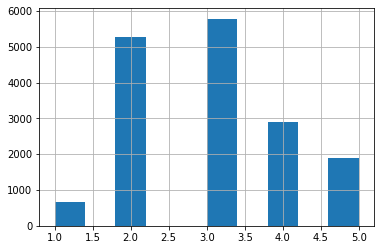

In [235]:
s_train_set['income_cat'].hist()

In [236]:
housing = s_train_set.copy()

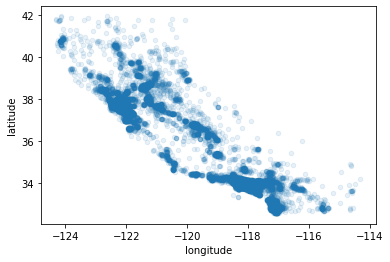

In [237]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.1)

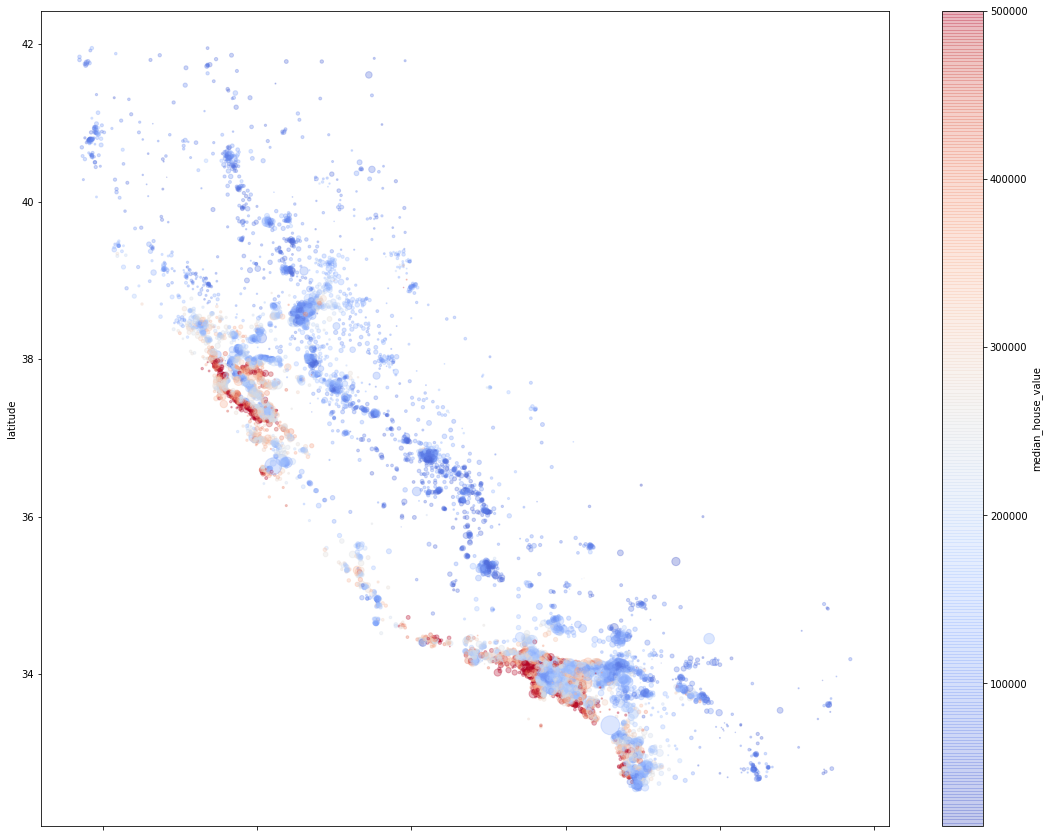

In [238]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.3, s = housing['population']/100, c = 'median_house_value', figsize = (19,15), cmap = plt.get_cmap('coolwarm'), colorbar = True)

In [239]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
longitude,1.000000,-0.925282,-0.112802,0.048968,0.071823,0.103150,0.058028,-0.014083,-0.048431,-0.009399
latitude,-0.925282,1.000000,0.016178,-0.039226,-0.068512,-0.110865,-0.072347,-0.079718,-0.141008,-0.085556
housing_median_age,-0.112802,0.016178,1.000000,-0.363376,-0.321486,-0.295719,-0.304269,-0.126131,0.102338,-0.153351
total_rooms,0.048968,-0.039226,-0.363376,1.000000,0.929521,0.852841,0.917664,0.198890,0.134520,0.220757
total_bedrooms,0.071823,-0.068512,-0.321486,0.929521,1.000000,0.875678,0.980174,-0.010267,0.048813,0.012212
population,0.103150,-0.110865,-0.295719,0.852841,0.875678,1.000000,0.905518,0.001294,-0.026439,0.021486
households,0.058028,-0.072347,-0.304269,0.917664,0.980174,0.905518,1.000000,0.009844,0.064008,0.034445
median_income,-0.014083,-0.079718,-0.126131,0.198890,-0.010267,0.001294,0.009844,1.000000,0.689556,0.903440
median_house_value,-0.048431,-0.141008,0.102338,0.134520,0.048813,-0.026439,0.064008,0.689556,1.000000,0.643667
income_cat,-0.009399,-0.085556,-0.153351,0.220757,0.012212,0.021486,0.034445,0.903440,0.643667,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1351cef60>,
      dtype=object)

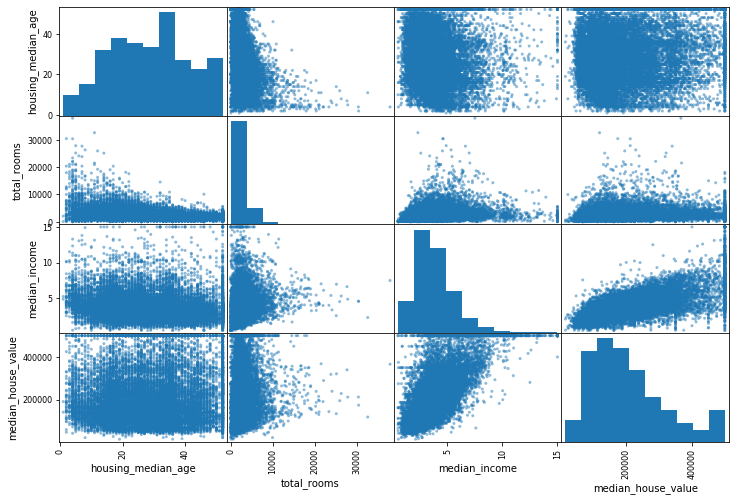

In [240]:
scatter_matrix(housing[['housing_median_age', 'total_rooms', 'median_income', 'median_house_value']], figsize = (12,8))

In [241]:
housing = s_train_set.copy()
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
16980,-122.30,37.57,36.0,2406.0,436.0,1189.0,403.0,4.7917,276100.0,NEAR BAY,4.0
10099,-117.95,33.93,37.0,2633.0,630.0,1904.0,630.0,2.6123,161300.0,<1H OCEAN,2.0
10775,-117.90,33.65,28.0,2043.0,430.0,1108.0,452.0,5.2549,261800.0,<1H OCEAN,4.0
19848,-119.18,36.40,39.0,1730.0,310.0,899.0,309.0,2.6648,129200.0,INLAND,2.0
4138,-118.17,34.12,35.0,2568.0,672.0,1696.0,605.0,2.9154,169200.0,<1H OCEAN,2.0
...,...,...,...,...,...,...,...,...,...,...,...
16745,-122.45,37.70,16.0,6457.0,1336.0,4375.0,1231.0,5.1788,267000.0,NEAR OCEAN,4.0
14411,-117.23,32.79,28.0,2453.0,648.0,1082.0,617.0,3.6250,266700.0,NEAR OCEAN,3.0
4565,-118.26,34.07,40.0,680.0,273.0,995.0,249.0,2.2607,165600.0,<1H OCEAN,2.0
1890,-120.01,38.93,22.0,3080.0,610.0,1045.0,425.0,2.9960,126100.0,INLAND,2.0


In [242]:
housing.drop('median_house_value', axis = 1, inplace = True)

In [243]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
16980,-122.30,37.57,36.0,2406.0,436.0,1189.0,403.0,4.7917,NEAR BAY,4.0
10099,-117.95,33.93,37.0,2633.0,630.0,1904.0,630.0,2.6123,<1H OCEAN,2.0
10775,-117.90,33.65,28.0,2043.0,430.0,1108.0,452.0,5.2549,<1H OCEAN,4.0
19848,-119.18,36.40,39.0,1730.0,310.0,899.0,309.0,2.6648,INLAND,2.0
4138,-118.17,34.12,35.0,2568.0,672.0,1696.0,605.0,2.9154,<1H OCEAN,2.0
...,...,...,...,...,...,...,...,...,...,...
16745,-122.45,37.70,16.0,6457.0,1336.0,4375.0,1231.0,5.1788,NEAR OCEAN,4.0
14411,-117.23,32.79,28.0,2453.0,648.0,1082.0,617.0,3.6250,NEAR OCEAN,3.0
4565,-118.26,34.07,40.0,680.0,273.0,995.0,249.0,2.2607,<1H OCEAN,2.0
1890,-120.01,38.93,22.0,3080.0,610.0,1045.0,425.0,2.9960,INLAND,2.0


In [244]:
housing_labels = s_train_set['median_house_value'].copy()

In [245]:
housing_labels

16980    276100.0
10099    161300.0
10775    261800.0
19848    129200.0
4138     169200.0
           ...   
16745    267000.0
14411    266700.0
4565     165600.0
1890     126100.0
2043     108300.0
Name: median_house_value, Length: 16512, dtype: float64

In [246]:
incomplete_rows = housing[housing.isnull().any(axis = 1)]

In [247]:
incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
5990,-117.73,34.10,37.0,3457.0,NaN,1344.0,530.0,5.8891,INLAND,4.0
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,NEAR BAY,4.0
14462,-117.27,32.85,26.0,1373.0,NaN,608.0,268.0,4.4250,NEAR OCEAN,3.0
4691,-118.37,34.07,50.0,2519.0,NaN,1117.0,516.0,4.3667,<1H OCEAN,3.0
2578,-124.06,40.86,34.0,4183.0,NaN,1891.0,669.0,3.2216,NEAR OCEAN,3.0
...,...,...,...,...,...,...,...,...,...,...
19890,-119.15,36.29,18.0,1435.0,NaN,657.0,254.0,2.4281,INLAND,2.0
19332,-122.91,38.46,18.0,2021.0,NaN,912.0,329.0,4.5000,<1H OCEAN,3.0
4046,-118.49,34.13,24.0,4394.0,NaN,1443.0,528.0,11.2979,<1H OCEAN,5.0
13069,-121.30,38.58,16.0,1537.0,NaN,1125.0,375.0,2.6471,INLAND,2.0


In [248]:
incomplete_rows['total_bedrooms'].fillna(housing['total_bedrooms'].median(), inplace = True)

/Users/mohanmohadikar/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [249]:
incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
5990,-117.73,34.10,37.0,3457.0,435.0,1344.0,530.0,5.8891,INLAND,4.0
563,-122.24,37.75,45.0,891.0,435.0,384.0,146.0,4.9489,NEAR BAY,4.0
14462,-117.27,32.85,26.0,1373.0,435.0,608.0,268.0,4.4250,NEAR OCEAN,3.0
4691,-118.37,34.07,50.0,2519.0,435.0,1117.0,516.0,4.3667,<1H OCEAN,3.0
2578,-124.06,40.86,34.0,4183.0,435.0,1891.0,669.0,3.2216,NEAR OCEAN,3.0
...,...,...,...,...,...,...,...,...,...,...
19890,-119.15,36.29,18.0,1435.0,435.0,657.0,254.0,2.4281,INLAND,2.0
19332,-122.91,38.46,18.0,2021.0,435.0,912.0,329.0,4.5000,<1H OCEAN,3.0
4046,-118.49,34.13,24.0,4394.0,435.0,1443.0,528.0,11.2979,<1H OCEAN,5.0
13069,-121.30,38.58,16.0,1537.0,435.0,1125.0,375.0,2.6471,INLAND,2.0


In [250]:
imputer = SimpleImputer(strategy = 'median')

In [251]:
numerical_housing = housing.drop('ocean_proximity', axis = 1)

In [252]:
numerical_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
16980,-122.30,37.57,36.0,2406.0,436.0,1189.0,403.0,4.7917,4.0
10099,-117.95,33.93,37.0,2633.0,630.0,1904.0,630.0,2.6123,2.0
10775,-117.90,33.65,28.0,2043.0,430.0,1108.0,452.0,5.2549,4.0
19848,-119.18,36.40,39.0,1730.0,310.0,899.0,309.0,2.6648,2.0
4138,-118.17,34.12,35.0,2568.0,672.0,1696.0,605.0,2.9154,2.0
...,...,...,...,...,...,...,...,...,...
16745,-122.45,37.70,16.0,6457.0,1336.0,4375.0,1231.0,5.1788,4.0
14411,-117.23,32.79,28.0,2453.0,648.0,1082.0,617.0,3.6250,3.0
4565,-118.26,34.07,40.0,680.0,273.0,995.0,249.0,2.2607,2.0
1890,-120.01,38.93,22.0,3080.0,610.0,1045.0,425.0,2.9960,2.0


In [253]:
imputer.fit(numerical_housing)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [254]:
imputer.statistics_

array([-118.5   ,   34.26  ,   29.    , 2131.    ,  435.    , 1170.    ,
        411.    ,    3.5344,    3.    ])

In [255]:
numerical_housing.median().values

array([-118.5   ,   34.26  ,   29.    , 2131.    ,  435.    , 1170.    ,
        411.    ,    3.5344,    3.    ])

In [256]:
X = imputer.transform(numerical_housing)

In [257]:
transformed_housing = pd.DataFrame(X, columns = numerical_housing.columns, index = list(housing.index.values))

In [258]:
transformed_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
16980,-122.30,37.57,36.0,2406.0,436.0,1189.0,403.0,4.7917,4.0
10099,-117.95,33.93,37.0,2633.0,630.0,1904.0,630.0,2.6123,2.0
10775,-117.90,33.65,28.0,2043.0,430.0,1108.0,452.0,5.2549,4.0
19848,-119.18,36.40,39.0,1730.0,310.0,899.0,309.0,2.6648,2.0
4138,-118.17,34.12,35.0,2568.0,672.0,1696.0,605.0,2.9154,2.0
...,...,...,...,...,...,...,...,...,...
16745,-122.45,37.70,16.0,6457.0,1336.0,4375.0,1231.0,5.1788,4.0
14411,-117.23,32.79,28.0,2453.0,648.0,1082.0,617.0,3.6250,3.0
4565,-118.26,34.07,40.0,680.0,273.0,995.0,249.0,2.2607,2.0
1890,-120.01,38.93,22.0,3080.0,610.0,1045.0,425.0,2.9960,2.0


In [259]:
transformed_housing.loc[incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
5990,-117.73,34.10,37.0,3457.0,435.0,1344.0,530.0,5.8891,4.0
563,-122.24,37.75,45.0,891.0,435.0,384.0,146.0,4.9489,4.0
14462,-117.27,32.85,26.0,1373.0,435.0,608.0,268.0,4.4250,3.0
4691,-118.37,34.07,50.0,2519.0,435.0,1117.0,516.0,4.3667,3.0
2578,-124.06,40.86,34.0,4183.0,435.0,1891.0,669.0,3.2216,3.0
...,...,...,...,...,...,...,...,...,...
19890,-119.15,36.29,18.0,1435.0,435.0,657.0,254.0,2.4281,2.0
19332,-122.91,38.46,18.0,2021.0,435.0,912.0,329.0,4.5000,3.0
4046,-118.49,34.13,24.0,4394.0,435.0,1443.0,528.0,11.2979,5.0
13069,-121.30,38.58,16.0,1537.0,435.0,1125.0,375.0,2.6471,2.0


In [260]:
housing_cat = housing[['ocean_proximity']]

In [261]:
housing_cat

,ocean_proximity
16980,NEAR BAY
10099,<1H OCEAN
10775,<1H OCEAN
19848,INLAND
4138,<1H OCEAN
...,...
16745,NEAR OCEAN
14411,NEAR OCEAN
4565,<1H OCEAN
1890,INLAND


In [262]:
le = LabelEncoder()

In [263]:
le_encoded_housing_cat = le.fit_transform(housing_cat)

/Users/mohanmohadikar/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [264]:
le_encoded_housing_cat

array([3, 0, 0, ..., 0, 1, 1])

In [265]:
le.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [266]:
ordinal_encoder = OrdinalEncoder()

In [267]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [268]:
housing_cat_encoded[:10]

array([[3.],
       [0.],
       [0.],
       [1.],
       [0.],
       [3.],
       [0.],
       [1.],
       [1.],
       [1.]])

In [269]:
onehot_encoder = OneHotEncoder(sparse = False)

In [270]:
housing_cat_onehot_encoded = onehot_encoder.fit_transform(housing_cat)

In [271]:
housing_cat_onehot_encoded

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [272]:
housing_cat

,ocean_proximity
16980,NEAR BAY
10099,<1H OCEAN
10775,<1H OCEAN
19848,INLAND
4138,<1H OCEAN
...,...
16745,NEAR OCEAN
14411,NEAR OCEAN
4565,<1H OCEAN
1890,INLAND


In [273]:
rooms_i, bedrooms_i, population_i, household_i = 3, 4, 5, 6

In [274]:
class CustomTransformer(BaseEstimator, TransformerMixin):
    add_bedrooms_per_room = True
    def __init__(self):
        pass
        
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        rooms_per_household = X[:, rooms_i]/X[:, household_i]
        population_per_household = X[:, population_i]/X[:, household_i]
        if add_bedrooms_per_room:
            print(add_bedrooms_per_room)
            bedrooms_per_household = X[:, bedrooms_i]/X[:, household_i]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_household]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
    

In [275]:
add_bedrooms_per_room = False
custom_features = CustomTransformer()

In [276]:
housing_with_custom_features = custom_features.transform(housing.values)

In [277]:
housing_with_custom_features

array([[-122.3, 37.57, 36.0, ..., 4.0, 5.970223325062035,
        2.9503722084367245],
       [-117.95, 33.93, 37.0, ..., 2.0, 4.17936507936508,
        3.022222222222222],
       [-117.9, 33.65, 28.0, ..., 4.0, 4.519911504424779,
        2.4513274336283186],
       ...,
       [-118.26, 34.07, 40.0, ..., 2.0, 2.7309236947791167,
        3.995983935742972],
       [-120.01, 38.93, 22.0, ..., 2.0, 7.247058823529412,
        2.458823529411765],
       [-119.69, 36.71, 25.0, ..., 3.0, 7.830985915492958,
        3.507042253521127]], dtype=object)

In [278]:
housing_with_custom_columns_df = pd.DataFrame(housing_with_custom_features, columns = list(housing.columns) + ['rooms_per_household', 'population_per_household'])

In [279]:
housing_with_custom_columns_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,population_per_household
0,-122.3,37.57,36,2406,436,1189,403,4.7917,NEAR BAY,4,5.97022,2.95037
1,-117.95,33.93,37,2633,630,1904,630,2.6123,<1H OCEAN,2,4.17937,3.02222
2,-117.9,33.65,28,2043,430,1108,452,5.2549,<1H OCEAN,4,4.51991,2.45133
3,-119.18,36.4,39,1730,310,899,309,2.6648,INLAND,2,5.59871,2.90939
4,-118.17,34.12,35,2568,672,1696,605,2.9154,<1H OCEAN,2,4.24463,2.80331
...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-122.45,37.7,16,6457,1336,4375,1231,5.1788,NEAR OCEAN,4,5.24533,3.55402
16508,-117.23,32.79,28,2453,648,1082,617,3.625,NEAR OCEAN,3,3.97569,1.75365
16509,-118.26,34.07,40,680,273,995,249,2.2607,<1H OCEAN,2,2.73092,3.99598
16510,-120.01,38.93,22,3080,610,1045,425,2.996,INLAND,2,7.24706,2.45882


In [280]:
num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy = 'median')),
('custom_transformer', CustomTransformer()),
('std_scaler', StandardScaler())
])

housing_num = num_pipeline.fit_transform(numerical_housing)

In [281]:
housing_num

array([[-1.3562008 ,  0.90761491,  0.58327564, ...,  0.94205147,
         0.23405088, -0.00984295],
       [ 0.81167729, -0.80090945,  0.6628106 , ..., -0.95445595,
        -0.52512721,  0.0017623 ],
       [ 0.83659543, -0.9323344 , -0.05300404, ...,  0.94205147,
        -0.38076326, -0.09044891],
       ...,
       [ 0.65718483, -0.73519698,  0.90141548, ..., -0.95445595,
        -1.13914843,  0.15904479],
       [-0.21495004,  1.54596467, -0.5302138 , ..., -0.95445595,
         0.77532517, -0.08923814],
       [-0.05547395,  0.50395256, -0.29160892, ..., -0.00620224,
         1.02286272,  0.08007068]])

In [282]:
class DataAttributeSeector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        return X[self.attribute_names].values

In [283]:
num_attributes = list(numerical_housing)

In [284]:
num_attributes

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'income_cat']

In [285]:
cat_attributes = ['ocean_proximity']

In [286]:
num_pipeline = Pipeline([
    ('selector', DataAttributeSeector(num_attributes)),
    ('imputer', SimpleImputer(strategy = 'median')),
    ('custom_transformer', CustomTransformer()),
    ('std_scaer', StandardScaler())
])
cat_pipeline = Pipeline([
    ('selector', DataAttributeSeector(cat_attributes)),
    ('one_hot_encoder', OneHotEncoder(sparse = False)),
])

In [287]:
housing_pipeline = FeatureUnion(transformer_list = [
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

In [288]:
housing_processed = housing_pipeline.fit_transform(housing)

In [289]:
housing_processed

array([[-1.3562008 ,  0.90761491,  0.58327564, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.81167729, -0.80090945,  0.6628106 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.83659543, -0.9323344 , -0.05300404, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.65718483, -0.73519698,  0.90141548, ...,  0.        ,
         0.        ,  0.        ],
       [-0.21495004,  1.54596467, -0.5302138 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.05547395,  0.50395256, -0.29160892, ...,  0.        ,
         0.        ,  0.        ]])

In [290]:
housing_processed.shape

(16512, 16)

In [291]:
lin_reg = LinearRegression()

In [292]:
lin_reg.fit(housing_processed, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [293]:
sample_data = housing.iloc[:10]

In [294]:
sample_labels = housing_labels[:10]

In [295]:
sample_processed_data = housing_pipeline.transform(sample_data)

In [296]:
lin_reg.predict(sample_processed_data)

array([284044.40021193, 174483.11845581, 284038.70297033, 104817.20830105,
       192387.77402199, 259669.44568402, 192105.21067946, 117809.841101  ,
        80569.25907421, 120901.00519807])

In [297]:
list(sample_labels)

[276100.0,
 161300.0,
 261800.0,
 129200.0,
 169200.0,
 194200.0,
 165500.0,
 140200.0,
 140000.0,
 145400.0]

In [298]:
housing_predictions = lin_reg.predict(housing_processed)

In [299]:
lin_mse = mean_squared_error(housing_labels, housing_predictions)

In [300]:
lin_rmse = np.sqrt(lin_mse)

In [301]:
lin_mse

4664197983.025634

In [302]:
lin_rmse

68294.93380204446

In [303]:
dtree_reg = DecisionTreeRegressor()

In [304]:
dtree_reg.fit(housing_processed, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [305]:
housing_predictions = dtree_reg.predict(lin_rmse = np.sqrt(lin_mse))
dtree_mse = mean_squared_error(housing_labels, housing_predictions)
dtree_rmse = np.sqrt(dtree_mse)

TypeError: predict() got an unexpected keyword argument 'lin_rmse'

In [ ]:
dtree_mse

In [ ]:
dtree_rmse

In [ ]:
rnd_forest_reg = RandomForestRegressor()

In [ ]:
rnd_forest_reg.fit(housing_processed, housing_labels)

In [ ]:
housing_predictions = rnd_forest_reg.predict(housing_processed)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)

In [ ]:
forest_mse

In [ ]:
forest_rmse

In [ ]:
scores = cross_val_score(rnd_forest_reg, housing_processed, housing_labels, scoring = 'neg_mean_squared_error', cv = 10)

In [ ]:
forest_rmse_scores = np.sqrt(-scores)

In [ ]:
forest_rmse_scores

In [ ]:
dtree_rmse_scores.mean()

In [ ]:
dtree_rmse_scores.std()

In [ ]:
scores = cross_val_score(dtree_reg, housing_processed, housing_labels, scoring = 'neg_mean_squared_error', cv = 10)

In [ ]:
dtree_rmse_scores = np.sqrt(-scores)

In [ ]:
dtree_rmse_scores

In [ ]:
dtree_rmse_scores.mean()

In [ ]:
dtree_rmse_scores.std()

In [ ]:
scores = cross_val_score(lin_reg, housing_processed, housing_labels, scoring = 'neg_mean_squared_error', cv = 10)

In [ ]:
lin_rmse_scores = np.sqrt(-scores)

In [ ]:
lin_rmse_scores

In [ ]:
lin_rmse_scores.mean()

In [ ]:
lin_rmse_scores.std()